# 30 Day Chart Challenge

Data Source: https://www.kaggle.com/datasets/zain280/fruit-consumption-habits

Adéntrese en el mundo de la nutrición y los hábitos alimentarios con este cautivador conjunto de datos sobre el consumo de frutas procedente de Kaggle.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv("data/kangle/Fruits_Consumptions_Habits.csv")
df_fruits = data.dropna()
df_fruits = df_fruits.drop_duplicates()
df_fruits.shape
df_fruits.head()


,ID,Age,Gender,Country,Favorite Fruit,Frequency of Consumption,Preferred Form of Fruit
0,1,32,Male,USA,Apple,Daily,Fresh
1,2,45,Female,Canada,Banana,2-3 times a week,Smoothie
2,3,28,Male,UK,Orange,Once a week,Juice
3,4,50,Female,Australia,Mango,Daily,Fresh
4,5,19,Female,Germany,Strawberry,4-5 times a week,Salad


In [4]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df_fruits['Age Group'] = pd.cut(df_fruits['Age'], bins=bins, labels=labels, right=False)

In [5]:
grouped_data = df_fruits.groupby(['Age Group', 'Frequency of Consumption', 'Favorite Fruit']).size().reset_index(name='Count')


/var/folders/zr/5cp0kjw90ldcs2bbgq01m31w0000gn/T/ipykernel_73020/2556080955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_fruits.groupby(['Age Group', 'Frequency of Consumption', 'Favorite Fruit']).size().reset_index(name='Count')


In [6]:
grouped_data.sort_values(by='Count', ascending=True).head()


,Age Group,Frequency of Consumption,Favorite Fruit,Count
0,0-20,2-3 times a week,Apple,0
1,0-20,2-3 times a week,Banana,0
2,0-20,2-3 times a week,Mango,0
3,0-20,2-3 times a week,Orange,0
4,0-20,2-3 times a week,Strawberry,0


/var/folders/zr/5cp0kjw90ldcs2bbgq01m31w0000gn/T/ipykernel_73020/4168135571.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = grouped_data.pivot_table(


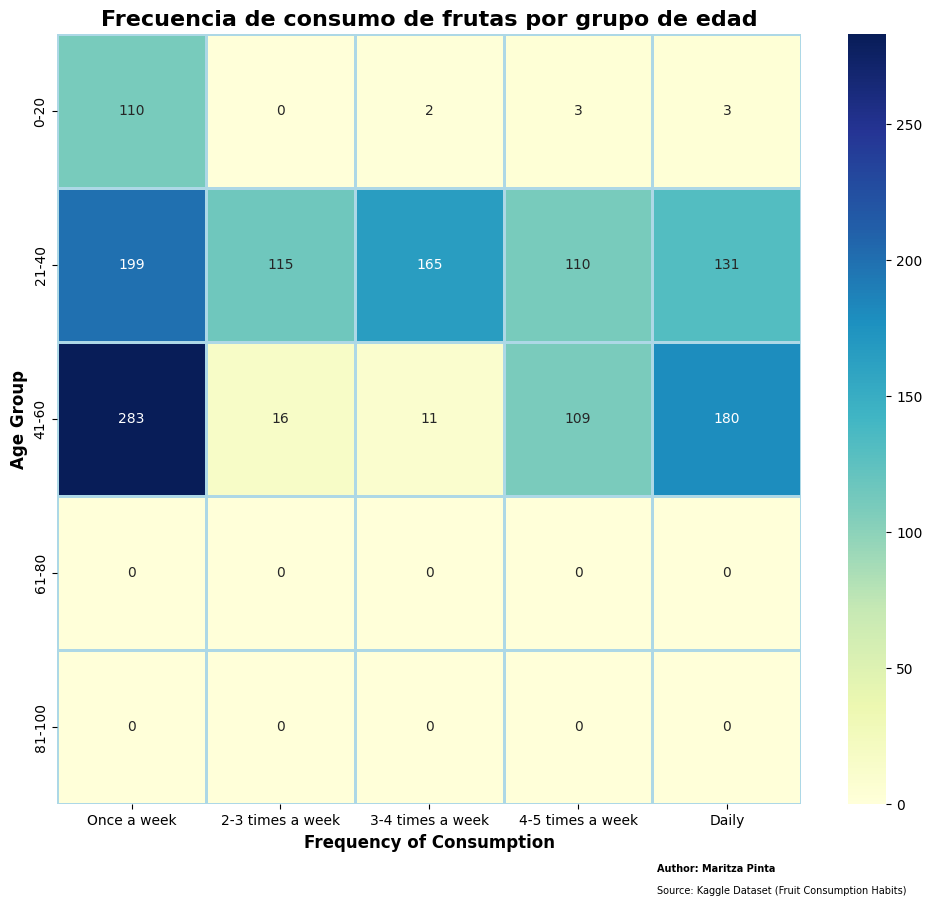

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

column_order = ["Once a week", "2-3 times a week", "3-4 times a week", "4-5 times a week", "Daily"]

heatmap_data = grouped_data.pivot_table(
    index=['Age Group'],
    columns='Frequency of Consumption',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

heatmap_data = heatmap_data[column_order]

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor='lightblue')
plt.title('Frecuencia de consumo de frutas por grupo de edad', fontsize=16, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Frequency of Consumption', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.gcf().text(0.625, 0.042, 'Author: Maritza Pinta', fontsize=7, color='black', ha='left', fontweight='bold')
plt.gcf().text(0.625, 0.020, 'Source: Kaggle Dataset (Fruit Consumption Habits)', fontsize=7, color='black', ha='left')

plt.savefig('anexos/day-14/fruit_consumption.png', dpi=300, bbox_inches='tight')

plt.show()

Este heatmap representa la frecuencia de consumo de frutas en diferentes grupos de edad. Las filas del gráfico corresponden a distintas categorías de frutas (como manzanas, naranjas, plátanos, etc.), mientras que las columnas representan grupos de edad (por ejemplo, 0-20, 21-40, 41-60, etc.). Los colores en el mapa varían en intensidad: los tonos más oscuros indican una mayor frecuencia de consumo, y los tonos más claros indican una menor frecuencia. Esta visualización permite identificar rápidamente qué frutas son más o menos populares entre distintos grupos etarios.
